In [1]:
from matplotlib.pyplot import cm
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from scipy import constants as cst
import sys, os, git
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_figures = current_path[len(git_path):] + '/'
path_in_folder = current_path[len(git_path)+1:]

In [3]:
sys.path.append(git_path + "/.submodules/pyplot-perso")
from plttools import PltTools

In [ ]:
data_path = git_path + "/.submodules/dataset-LJ-fluid/analysis/varying-n-particle/"
ref_time = 463.7943 # LJ time in fs
ref_temp = 50.3219 # LJ temp in K
cmap_cool = cm.cool
cmap_dark_blue_to_cyan = LinearSegmentedColormap.from_list('dark_blue_to_cyan', ['#1D11CB', cmap_cool(0.0)])
cmap_dark_blue_to_pink = LinearSegmentedColormap.from_list('dark_blue_to_cyan', ['#1D11CB', cmap_cool(1.0)])
cmap_cyan_to_green_blue = LinearSegmentedColormap.from_list('cyan_to_green_blue',
    ['#00FFFF', '#00FA9A', '#3683e2']  # Cyan → Medium Spring Green → Your Blue Shade
)

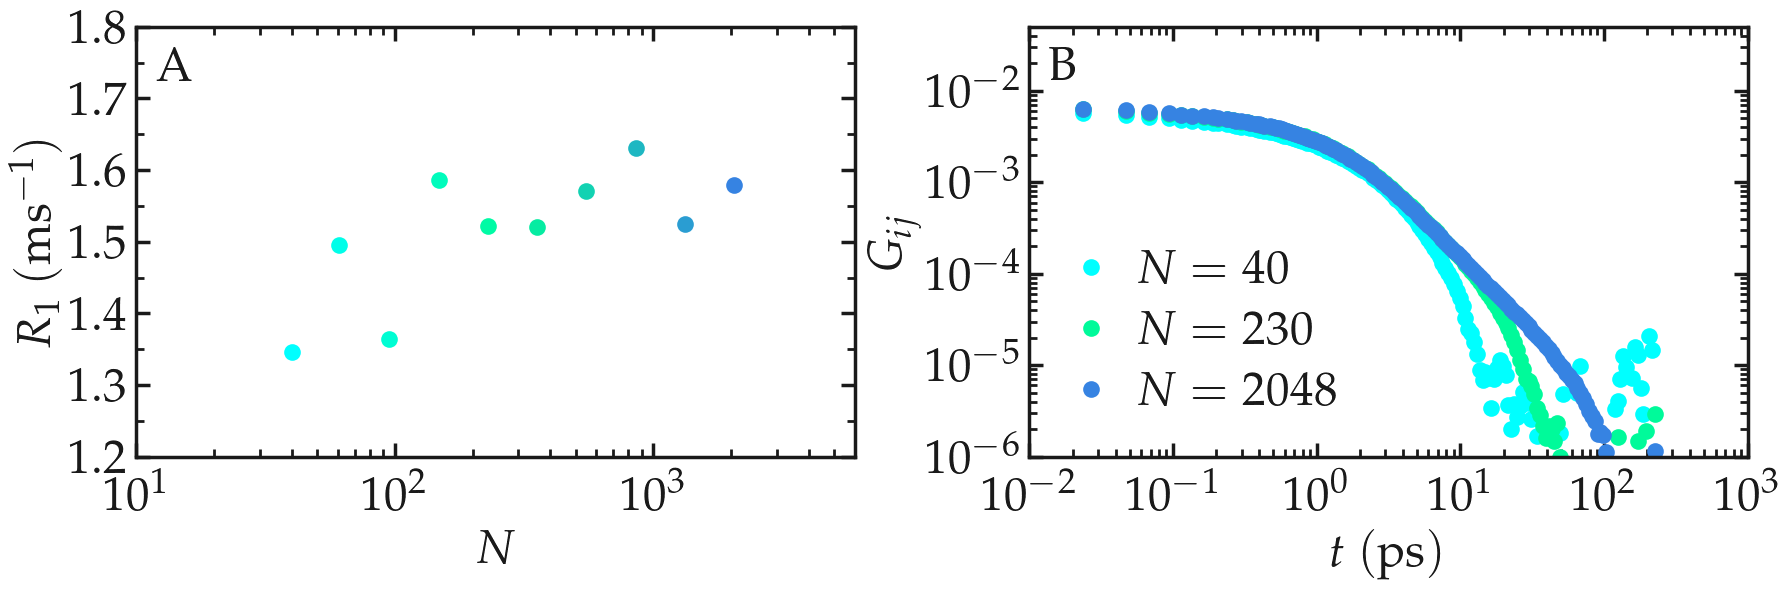

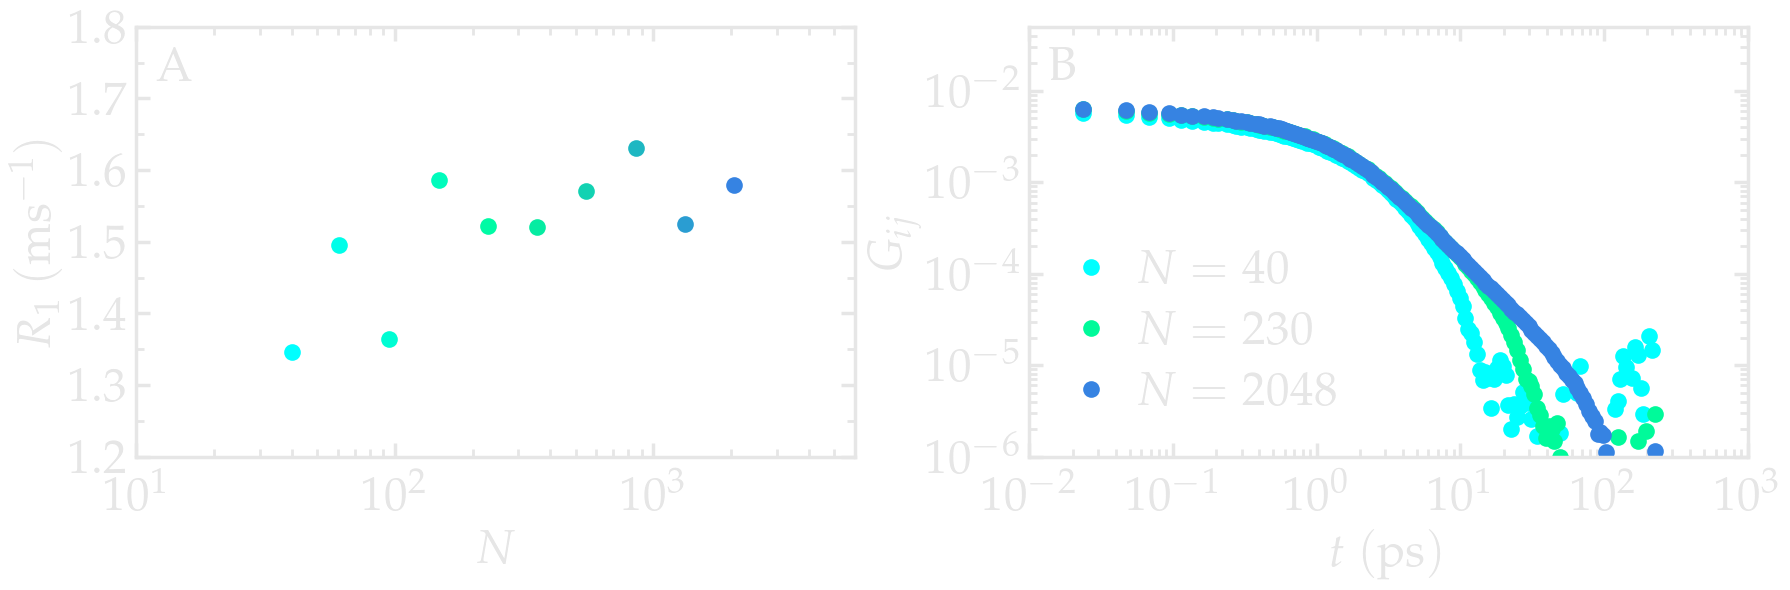

In [35]:
filename = "box-size"

for dark_mode in [False, True]:

    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,6), dark_mode = dark_mode,
                         transparency = True, use_serif=True, n_colone = 2)
    
    # Panel 1
    all_numbers = np.array([40, 61, 95, 148, 230, 356, 551, 854, 1322, 2048]) # unitless
    colors = cmap_cyan_to_green_blue(np.linspace(0, 1, len(all_numbers)))
    myplt.add_panel()
    N, R1, eR1 = np.loadtxt(data_path+f"R1_at_target_vs_n.dat").T
    for N0, R10, color in zip(N, R1, colors):
        if ((N0 == all_numbers[0]) | (N0 == all_numbers[-1])):
            myplt.add_plot(x = N0, y = R10*1000, type = "semilogx", linewidth_data = 3,
                        marker = "o", data_color = color[:3], markersize = 12),
                        # data_label = f'$T = {np.int32(T*ref_temp)}~\mathrm K$')
        else:
            myplt.add_plot(x = N0, y = R10*1000, type = "semilogx", linewidth_data = 3,
                        marker = "o", data_color = color[:3], markersize = 12) 
    myplt.complete_panel(ylabel = r'$R_1~(\mathrm{ms}^{-1})$', xlabel = r'$N$',
                         xpad = 15, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_boundaries=(10, 6000), y_boundaries=(1.2, 1.8))


    # Panel 1
    all_numbers = np.array([40, 230, 2048]) # unitless
    colors = cmap_cyan_to_green_blue(np.linspace(0, 1, len(all_numbers)))
    myplt.add_panel()
    for N0, color in zip(np.int32(all_numbers), colors):
        t, Gij = np.loadtxt(data_path+f"n{N0}/Gi_vs_f.dat").T
        myplt.add_plot(x = t, y = Gij, type = "loglog", linewidth_data = 3,
                    marker = "o", data_color = color[:3], markersize = 12,
                    data_label = f'$N = {np.int32(N0)}$')
    myplt.complete_panel(ylabel = r'$G_{ij}$', xlabel = r'$t~(\mathrm{ps})$',
                         xpad = 15, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_boundaries=(0.01, 1000), y_boundaries=(1e-6, 0.05))

    myplt.add_subplotlabels(type_label_panel = "A")
    myplt.save_figure(filename = filename, saving_path = git_path+path_figures)